Saving ex1data1.txt to ex1data1 (1).txt
First 10 examples from the dataset:
x = [2104 3], y = 399900
x = [1600 3], y = 329900
x = [2400 3], y = 369000
x = [1416 2], y = 232000
x = [3000 4], y = 539900
x = [1985 4], y = 299900
x = [1534 3], y = 314900
x = [1427 3], y = 198999
x = [1380 3], y = 212000
x = [1494 3], y = 242500


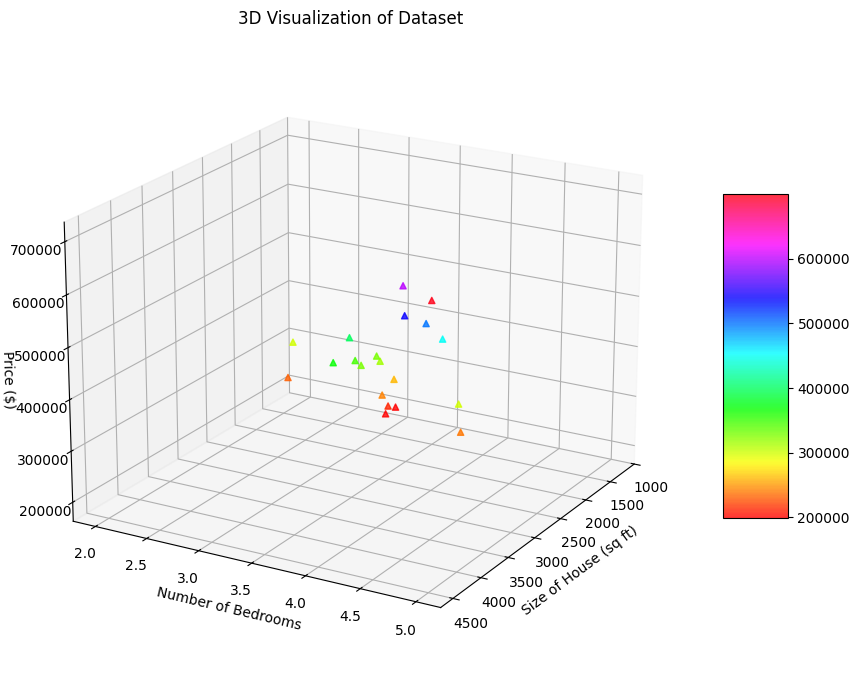

mu= [2000.68085106    3.17021277], std = [7.86202619e+02 7.52842809e-01]
First 10 examples from the normalized dataset:
x = [0.1314 -0.2261]
x = [-0.5096 -0.2261]
x = [0.5079 -0.2261]
x = [-0.7437 -1.5544]
x = [1.2711 1.1022]
x = [-0.0199 1.1022]
x = [-0.5936 -0.2261]
x = [-0.7297 -0.2261]
x = [-0.7895 -0.2261]
x = [-0.6445 -0.2261]
Iteration 1	Cost: 64297776251.620102	Gradient: -340412.660 -105764.133 -54708.822
Iteration 2	Cost: 63031018305.521317	Gradient: -337008.533 -104400.141 -53569.489
Iteration 3	Cost: 61790694237.532494	Gradient: -333638.448 -103056.168 -52449.188
Iteration 4	Cost: 60576236901.991035	Gradient: -330302.063 -101731.908 -51347.615
Iteration 5	Cost: 59387091739.988602	Gradient: -326999.043 -100427.059 -50264.474
Iteration 6	Cost: 58222716488.389389	Gradient: -323729.052 -99141.324 -49199.470
Iteration 7	Cost: 57082580895.895401	Gradient: -320491.762 -97874.410 -48152.317
Iteration 8	Cost: 55966166445.978844	Gradient: -317286.844 -96626.028 -47122.729
Iteration 9	

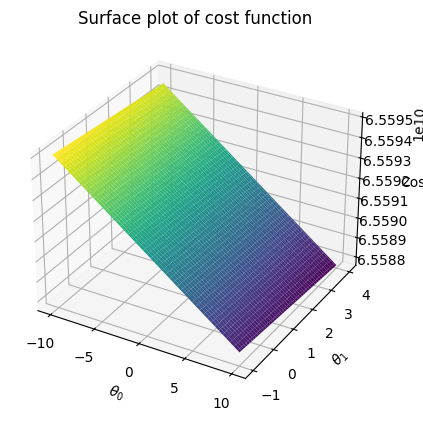

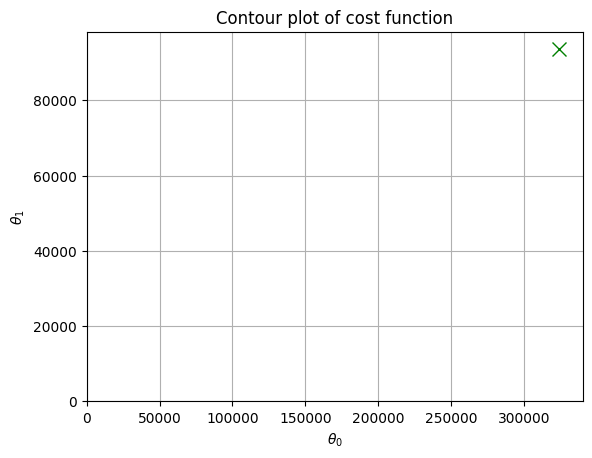

In [6]:
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize

# Load data
from google.colab import files
uploaded = files.upload()
data = np.loadtxt('ex1data2.txt', delimiter=',')
X = data[:, 0:2]
y = data[:, 2].reshape(-1, 1)
m = len(y)

print('First 10 examples from the dataset:')
for i in range(10):
    print(f'x = [{X[i, 0]:.0f} {X[i, 1]:.0f}], y = {y[i, 0].item():.0f}')

# ==================== Part 1: Plotting ====================
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
my_cmap = plt.get_cmap('hsv')
sctt = ax.scatter3D(X[0:20, 0], X[0:20, 1], y[0:20, 0], alpha=0.8, c=y[0:20, 0], cmap=my_cmap, marker='^')
ax.set_xlabel('Size of House (sq ft)')
ax.set_ylabel('Number of Bedrooms')
ax.set_zlabel('Price ($)')
fig.colorbar(sctt, ax=ax, shrink=0.5, aspect=5)
ax.view_init(elev=20, azim=30)
ax.grid(True)
plt.title('3D Visualization of Dataset')
plt.tight_layout()
plt.show()

# ==================== Part 2: Feature Normalization ====================
def featureNormalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

X, mu, sigma = featureNormalize(X)
print(f'mu= {mu}, std = {sigma}')
print('First 10 examples from the normalized dataset:')
for i in range(10):
    print(f'x = [{X[i, 0]:.4f} {X[i, 1]:.4f}]')

# Add intercept term to X
X = np.hstack([np.ones((m, 1)), X])

# ==================== Part 3: Cost Function ====================
def cost_function(theta, X, y):
    m = len(y)
    theta = theta.reshape(-1, 1)
    predictions = X @ theta
    errors = predictions - y
    J = (1 / (2 * m)) * np.sum(errors ** 2)
    return J

# ==================== Part 4: Gradient Descent ====================
def compute_gradient(theta, X, y):
    m = len(y)
    theta = theta.reshape(-1, 1)
    predictions = X @ theta
    errors = predictions - y
    grad = (1 / m) * (X.T @ errors)
    return grad.flatten()

def gradientDescent(X, y, theta, alpha, iterations):
    J_history = np.zeros(iterations)
    for iter in range(iterations):
        grad_J = compute_gradient(theta, X, y)
        theta = theta - alpha * grad_J.reshape(-1, 1)
        J_history[iter] = cost_function(theta, X, y)
        print(f"Iteration {iter + 1}\tCost: {J_history[iter]:.6f}\tGradient: {grad_J[0]:.3f} {grad_J[1]:.3f} {grad_J[2]:.3f}")
    return theta

# Initialize parameters
iterations = 300
alpha = 0.01
theta = np.zeros((3, 1))

# Run Gradient Descent
theta = gradientDescent(X, y, theta, alpha, iterations)
print("Theta found by gradient descent: ", theta.ravel())

# ==================== Part 5: Prediction ====================
input_features = np.array([2000, 3])
normalized_features = (input_features - mu) / sigma
predict1 = np.hstack([1, normalized_features]) @ theta
print(f'For a house with {input_features[0]} sqft and {input_features[1]} bedrooms, we predict a price of ${(predict1).item():.2f}')

# ==================== Part 6: Visualization ====================
print('Visualizing J(theta_0, theta_1) ...')
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([[theta0_vals[i]], [theta1_vals[j]], [0]])
        J_vals[i, j] = cost_function(t, X, y)

J_vals = J_vals.T

# Surface plot
theta0_vals_mesh, theta1_vals_mesh = np.meshgrid(theta0_vals, theta1_vals)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(theta0_vals_mesh, theta1_vals_mesh, J_vals, cmap='viridis')
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel('Cost')
plt.title('Surface plot of cost function')

# Contour plot
plt.figure()
cp = plt.contour(theta0_vals, theta1_vals, J_vals, levels=np.logspace(-2, 3, 20))
plt.clabel(cp)
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.plot(theta[0, 0], theta[1, 0], 'gx', markersize=10, linewidth=2)
plt.title('Contour plot of cost function')
plt.grid(True)
plt.show()
